## Import Libraries 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Import Training Data 

In [32]:
# Import Training Data Set
df_train_1 = pd.read_csv(r'Data\Train\Data_illustrated_CSV.csv')
df_train_2 = pd.read_csv(r'Data\Train\corridor_CSV\July22_51.csv')                  
df_train_3 = pd.read_csv(r'Data\Train\corridor_CSV\July22_59.csv')    

# Combine Training Set                 
df_train_1.columns = df_train_2.columns = df_train_3.columns 
combine = [df_train_1, df_train_2, df_train_3]
df_training = pd.concat(combine, axis=0, ignore_index=True)

# Shuffle Dataset
df_training = shuffle(df_training)



## Feature Reduction 

#### Group Laser Points

In [33]:
laser_df = pd.DataFrame()
bins_sz = 15*4
bin_list = np.arange(0,1080,bins_sz)
for c in bin_list:    # loop every 40 columns
    laser_df[c/bins_sz] = df_training.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df.shape

(52027, 18)

#### Extract Useful Features

In [34]:
# Useful Features
laser = np.array(laser_df)  
local_goal = np.array(df_training)[:,1084:1088]                  
pose = np.array(df_training)[:,1088:1092]                  
cmd_vel = np.array(df_training)[:,1092:]  

# combine features
features = np.concatenate((laser,local_goal,pose), axis=1)
cmd_vel = np.array(df_training)[:,1092:]    

# Initialize Training Set Inputs
X_training = features
y_training = cmd_vel
y_training_vel = cmd_vel[:,0:1]
y_training_ang = cmd_vel[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" laser features shape --> ", laser.shape)  
print(" total training features shape --> ", X_training.shape)  
print(" total training translation velocity predictions shape --> ", y_training_vel.shape)  
print(" total training angular velocity predictions shape --> ", y_training_ang.shape) 
print("==================================================================")
# Confirmed that data is accurate, not mismanaged. Compared to original data. Shape makes sense.

 laser features shape -->  (52027, 18)
 total training features shape -->  (52027, 26)
 total training translation velocity predictions shape -->  (52027, 1)
 total training angular velocity predictions shape -->  (52027, 1)


## Outlier Analysis

In [35]:
print(" training dataset shape --> ", df_training.shape)

# df_short = pd.DataFrame(X_train)
df_short = df_train_1.iloc[:,1080:]
df_short.info()
# df_short.describe()

 training dataset shape -->  (52027, 1094)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10.045     4065 non-null   float64
 1   4.254      4065 non-null   float64
 2   -0.7629    4065 non-null   float64
 3   0.64652    4065 non-null   float64
 4   10.045.1   4065 non-null   float64
 5   4.254.1    4065 non-null   float64
 6   -0.7629.1  4065 non-null   float64
 7   0.64652.1  4065 non-null   float64
 8   9.8956     4065 non-null   float64
 9   4.4486     4065 non-null   float64
 10  -0.40439   4065 non-null   float64
 11  0.91459    4065 non-null   float64
 12  0.57988    4065 non-null   float64
 13  -0.2887    4065 non-null   float64
dtypes: float64(14)
memory usage: 444.7 KB


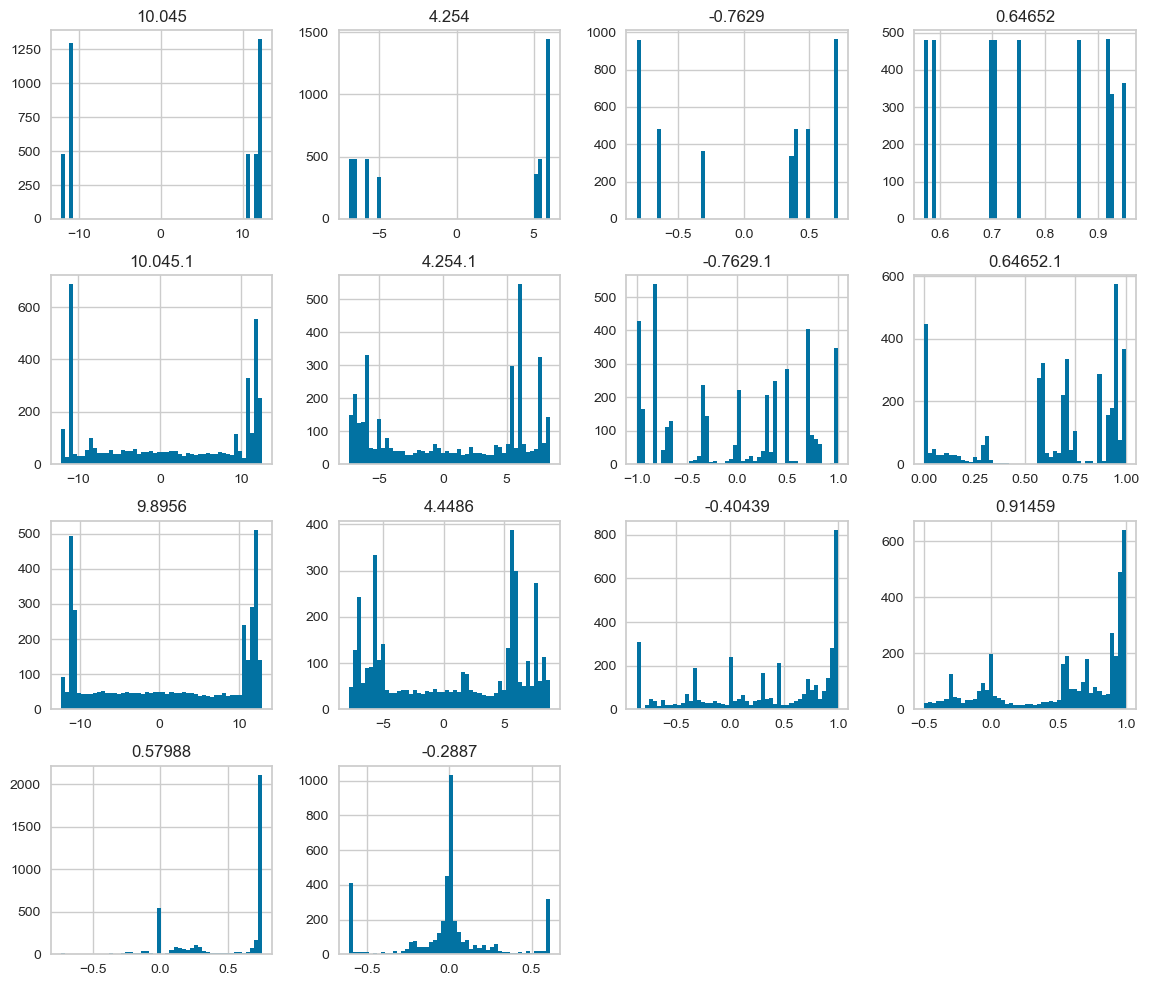

In [36]:
df_short.hist(bins=50, figsize=(14,12))
plt.show()

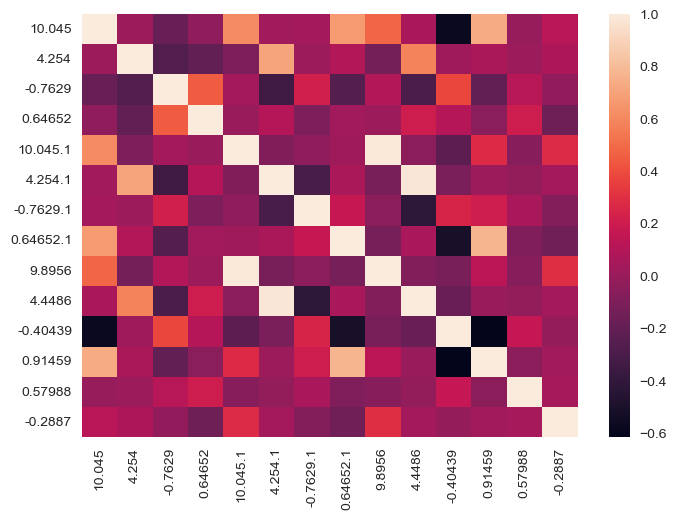

In [37]:
# df_short = pd.DataFrame(X_train[:,-8:])
import seaborn as sns
df_train_1.iloc[:,1080:].corr()
sns.heatmap(df_train_1.iloc[:,1080:].corr());


c:\Users\Jai Sharma\CondaFiles\envs\ml_env\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


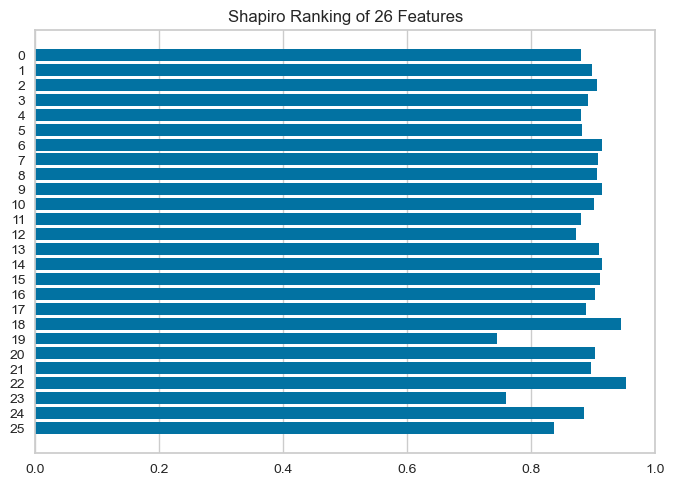

<AxesSubplot:title={'center':'Shapiro Ranking of 26 Features'}>

In [38]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_training, y_training)           # Fit the data to the visualizer
visualizer.transform(X_training)        # Transform the data
visualizer.show()              # Finalize and render the figure

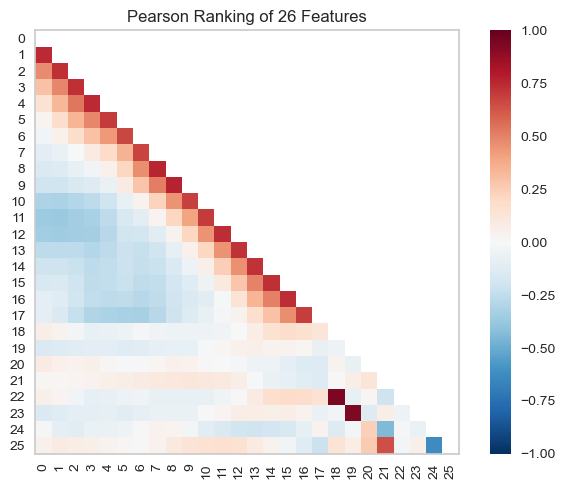

<AxesSubplot:title={'center':'Pearson Ranking of 26 Features'}>

In [39]:
from yellowbrick.features import Rank2D



# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_training, y_training)           # Fit the data to the visualizer
visualizer.transform(X_training)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Training / Validation Split

In [40]:

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train_vel = y_train[:,0:1]
y_train_ang = y_train[:,1:]

y_val_vel = y_val[:,0:1]
y_val_ang = y_val[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" training features shape --> ", X_train.shape)  
print(" training translation velocity predictions shape --> ", y_train_vel.shape)  
print(" training angular velocity predictions shape --> ", y_train_ang.shape) 
print("==================================================================")
# Print Training Input Shapes
print(" validation features shape --> ", X_val.shape)  
print(" validation translation velocity predictions shape --> ", y_val_vel.shape)  
print(" validation angular velocity predictions shape --> ", y_val_ang.shape) 
print("==================================================================")

 training features shape -->  (39020, 26)
 training translation velocity predictions shape -->  (39020, 1)
 training angular velocity predictions shape -->  (39020, 1)
 validation features shape -->  (13007, 26)
 validation translation velocity predictions shape -->  (13007, 1)
 validation angular velocity predictions shape -->  (13007, 1)


# Import Testing Data

In [41]:
# Testing Data Set
df_test_1 = pd.read_csv(r'Data\Test\Aug14_Box_g1.csv')
df_test_2 = pd.read_csv(r'Data\Test\July22_15.csv')

# pick test set
df_test = df_test_2

laser_df_test = pd.DataFrame()
bins_sz = 15*4
bin_list = np.arange(0,1080,bins_sz)

for c in bin_list:    # loop every 20 columns
    laser_df_test[c/bins_sz] = df_test.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
    
laser_df_test.shape

# Useful Features
laser = np.array(laser_df_test)  
local_goal = np.array(df_test)[:,1084:1088]                  
pose = np.array(df_test)[:,1088:1092]                  

# combine features
features = np.concatenate((laser,local_goal,pose), axis=1)
cmd_vel = np.array(df_test)[:,1092:]    

X_test = features
y_test_vel = cmd_vel[:,0:1]
y_test_ang = cmd_vel[:,1:]

print(" test features shape --> ", X_test.shape)  
print(" test translation velocity predictions shape --> ", y_test_vel.shape)  
print(" test angular velocity predictions shape --> ", y_test_ang.shape) 

# Confirmed that data is accurate, not mismanaged. Compared to original data. Shape makes sense.

 test features shape -->  (25446, 26)
 test translation velocity predictions shape -->  (25446, 1)
 test angular velocity predictions shape -->  (25446, 1)


## Scale Training and Test Data

In [42]:
scale = StandardScaler()
scale.fit(X_train)

x_train_scaled = scale.transform(X_train)
x_test_scaled =  scale.transform(X_test)
x_val_scaled =  scale.transform(X_val)


# Un Comment if predicting v only
# y_train = y_train_vel
# y_test = y_test_vel
# y_val = y_val_vel 

# Un Comment if predicting w only
# y_train = y_train_ang
# y_test = y_test_ang
# y_val = y_val_ang 

scale.fit(df_train_1)
x_sample = scale.transform(df_train_1)



In [43]:
print("UnScaled Training Set")
pd.DataFrame(X_train).describe()

UnScaled Training Set


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,...,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,3.902000e+04,39020.000000,39020.000000,39020.000000,39020.000000
mean,5.604521,5.619240,5.706615,5.727282,5.917999,5.853002,5.882853,6.070205,6.050346,5.913807,...,5.456380,5.537378,1.882519,2.893206,-0.100451,6.531638e-01,1.929265,2.857758,0.250555,0.572453
std,2.995984,2.996919,3.165603,3.206712,3.404811,3.223252,3.013918,3.176157,3.138889,2.979284,...,3.106392,3.164633,5.345492,1.919048,0.685393,3.058394e-01,5.332454,1.950035,0.642568,0.443443
min,0.342849,0.309959,0.300883,0.302383,0.321956,0.371803,0.465340,0.615937,0.951422,0.834194,...,0.421221,0.437230,-12.169000,-7.379500,-1.000000,6.123200e-17,-12.362000,-7.848300,-0.865900,-0.499820
25%,3.765845,3.617149,3.487555,3.450985,3.676487,3.822047,3.804858,3.828984,3.845715,3.913845,...,3.492557,3.408085,-3.875300,2.116800,-0.762900,4.891400e-01,-3.733600,2.132100,-0.343440,0.299577
50%,5.100498,5.187012,5.147478,4.967613,4.906967,5.222727,5.308257,5.496588,5.226737,5.191425,...,4.665772,4.805003,2.168500,3.131300,-0.096513,7.053400e-01,2.150500,3.088400,0.355535,0.718375
75%,6.574880,6.761978,7.245844,7.166127,7.283338,6.904890,7.410685,7.409224,7.312178,7.174245,...,6.721782,6.809655,6.149300,3.972800,0.564920,9.298700e-01,6.472350,3.905600,0.908187,0.938072
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.915400,20.000000,...,20.000000,20.000000,12.557000,8.396200,1.000000,1.000000e+00,12.862000,8.765800,1.000000,1.000000


In [44]:
print("Scaled Training Set")
pd.DataFrame(x_train_scaled).describe()

Scaled Training Set


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,...,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04,3.902000e+04
mean,8.730470e-14,8.651468e-14,1.039002e-13,-6.411323e-14,5.168493e-14,1.056837e-13,-1.424015e-13,5.938943e-14,-9.756512e-14,-8.894718e-14,...,-1.754268e-14,-5.649065e-14,6.812701e-15,9.041531e-14,1.498869e-14,1.069061e-13,-1.998670e-15,5.774417e-14,1.424887e-15,-1.294627e-13
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.756264e+00,-1.771602e+00,-1.707669e+00,-1.691754e+00,-1.643590e+00,-1.700540e+00,-1.797521e+00,-1.717276e+00,-1.624457e+00,-1.705000e+00,...,-1.620924e+00,-1.611629e+00,-2.628701e+00,-5.353091e+00,-1.312474e+00,-2.135670e+00,-2.680088e+00,-5.490258e+00,-1.737512e+00,-2.418093e+00
25%,-6.137216e-01,-6.680583e-01,-7.010002e-01,-7.098629e-01,-6.583452e-01,-6.301031e-01,-6.894750e-01,-7.056485e-01,-7.023693e-01,-6.712981e-01,...,-6.321960e-01,-6.728490e-01,-1.077149e+00,-4.045840e-01,-9.665367e-01,-5.363139e-01,-1.061976e+00,-3.721303e-01,-9.244205e-01,-6.153639e-01
50%,-1.682350e-01,-1.442260e-01,-1.766311e-01,-2.369026e-01,-2.969461e-01,-1.955427e-01,-1.906499e-01,-1.806033e-01,-2.623919e-01,-2.424714e-01,...,-2.545134e-01,-2.314278e-01,5.350008e-02,1.240703e-01,5.745627e-03,1.706021e-01,4.148900e-02,1.182774e-01,1.633774e-01,3.290707e-01
75%,3.238907e-01,3.813094e-01,4.862417e-01,4.487037e-01,4.010080e-01,3.263479e-01,5.069321e-01,4.215900e-01,4.020049e-01,4.230729e-01,...,4.073596e-01,4.020349e-01,7.982119e-01,5.625746e-01,9.707999e-01,9.047550e-01,8.519799e-01,5.373521e-01,1.023457e+00,8.245127e-01
max,4.804987e+00,4.798577e+00,4.515274e+00,4.450946e+00,4.135965e+00,4.389101e+00,4.684046e+00,4.385795e+00,4.417242e+00,4.728108e+00,...,4.681897e+00,4.570137e+00,1.996938e+00,2.867601e+00,1.605597e+00,1.134061e+00,2.050252e+00,3.029749e+00,1.166343e+00,9.641661e-01
